In [1]:
!pip install -e ..

Obtaining file:///Users/tobiasolbruck/University/PDS/PDS_Project
  Attempting uninstall: PDS-Project
    Found existing installation: PDS-Project 0.0.1.dev12
    Uninstalling PDS-Project-0.0.1.dev12:
      Successfully uninstalled PDS-Project-0.0.1.dev12
  Running setup.py develop for PDS-Project


In [2]:
import nextbike

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import numpy as np
import scipy.stats as stats
import math

In [4]:
dfWeather = nextbike.io.getWeatherData()
dfWeather.describe()

,temperature,precipitation
count,52560.000000,52560.000000
mean,10.354522,0.011349
std,8.998511,0.089612
min,-12.900000,0.000000
25%,3.700000,0.000000
50%,9.100000,0.000000
75%,16.000000,0.000000
max,43.100000,8.630000


In [5]:
nextbike.visualization.visualizeWeatherData(dfWeather).show

NameError: name 'np' is not defined

In [5]:
meanTemperaturePerWeek = dfWeather.groupby(dfWeather.index.week).temperature.mean()
minTemperaturePerWeek = dfWeather.groupby(dfWeather.index.week).temperature.min()
maxTemperaturePerWeek = dfWeather.groupby(dfWeather.index.week).temperature.max()
meanPrecipitationPerWeek = dfWeather.groupby(dfWeather.index.week).precipitation.mean()

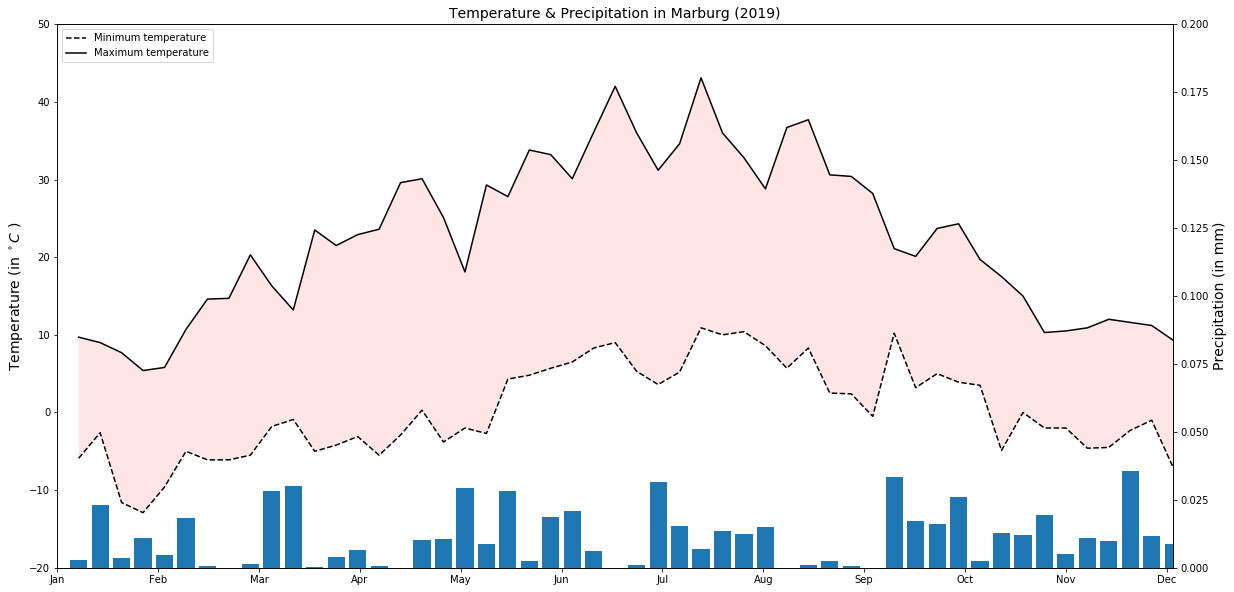

In [6]:
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(minTemperaturePerWeek.index, minTemperaturePerWeek, '--k', label="Minimum temperature")
ax1.plot(maxTemperaturePerWeek.index, maxTemperaturePerWeek, '-k', label="Maximum temperature")

ax1.set_ylabel('Temperature (in $^\circ C$ )',size=14)
ax1.legend(loc=2)

ax1=plt.gca()
ax1.axis([0,52,-20,50])
plt.gca().fill_between(minTemperaturePerWeek.index, minTemperaturePerWeek, maxTemperaturePerWeek, facecolor='red', alpha=0.1)

ax2 = ax1.twinx()
ax2.bar(meanPrecipitationPerWeek.index, meanPrecipitationPerWeek)
ax2.set_ylabel('Precipitation (in mm)',size=14)
ax2.axis([0,52,0,0.2])
ax2.set_xlabel('Month',size=14)

plt.title('Temperature & Precipitation in Marburg (2019)',size=14)
plt.xticks(np.arange(0,52,4.7), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.show()

In [7]:
def visualizeWeatherData(df):
    # calculate aggregate statistics
    minTemperaturePerWeek = df.groupby(df.index.week).temperature.min()
    maxTemperaturePerWeek = df.groupby(df.index.week).temperature.max()
    meanPrecipitationPerWeek = df.groupby(df.index.week).precipitation.mean()
    # create plot
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # create plot for temperature data
    ax1.plot(minTemperaturePerWeek.index, minTemperaturePerWeek, '--k', label="Minimum temperature")
    ax1.plot(maxTemperaturePerWeek.index, maxTemperaturePerWeek, '-k', label="Maximum temperature")
    ax1.set_ylabel('Temperature (in $^\circ C$ )',size=14)
    ax1.legend(loc=2)
    # fill area between min and max line
    ax1=plt.gca()
    ax1.axis([0,52,-20,50])
    plt.gca().fill_between(minTemperaturePerWeek.index, minTemperaturePerWeek, maxTemperaturePerWeek, facecolor='red', alpha=0.1)

    # create plot for precipitation data
    ax2 = ax1.twinx()
    ax2.bar(meanPrecipitationPerWeek.index, meanPrecipitationPerWeek)
    ax2.set_ylabel('Precipitation (in mm)',size=14)
    ax2.axis([0,52,0,0.2])
    ax2.set_xlabel('Month',size=14)

    plt.title('Temperature & Precipitation in Marburg (2019)',size=14)
    plt.xticks(np.arange(0,52,4.7), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

    return plt


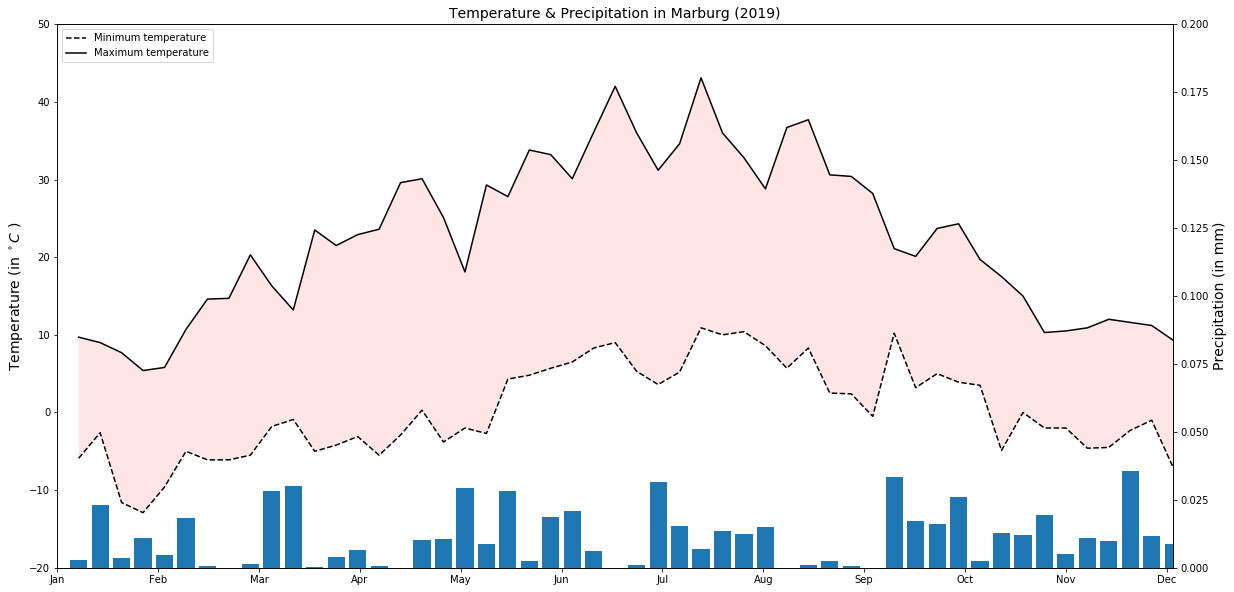